<a href="https://colab.research.google.com/github/hsabaghpour/pytorch-training-playground/blob/main/CNN_on_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CNN**

Imagine teaching a computer to recognize objects in photos, like identifying cats or cars. Convolutional Neural Networks (CNNs) are like the brain's visual system, specifically designed for this kind of task. Here’s how they work in a nutshell:

**Convolutional Layers:** Think of these layers as a bunch of tiny windows that scan across the image, picking up features like edges, textures, and patterns. It's like how you might squint and look closely to spot details.


**Activation Functions:** Once the features are detected, activation functions like ReLU (Rectified Linear Unit) add a bit of magic, helping the network to understand and learn complex patterns, almost like turning on a light bulb in your brain.


**Pooling Layers:** To make the process faster and more efficient, pooling layers zoom out a bit, focusing on the most important parts of the image. It’s like summarizing a story, keeping only the key points.


**Fully Connected Layers:** After gathering all these cool features, the network connects everything together in fully connected layers. This part is like the brain’s decision-making area, piecing together all the clues to make a final judgment.


**Output Layer:** Finally, the output layer, often using a softmax function, gives you the result, like saying, “Hey, this is a cat!” with a confidence score to boot.

CNNs are superstars in the world of image recognition, making them perfect for applications like facial recognition, self-driving cars, and even spotting diseases in medical images. They’re the reason why your phone camera can now tell a cat from a dog in your photos!

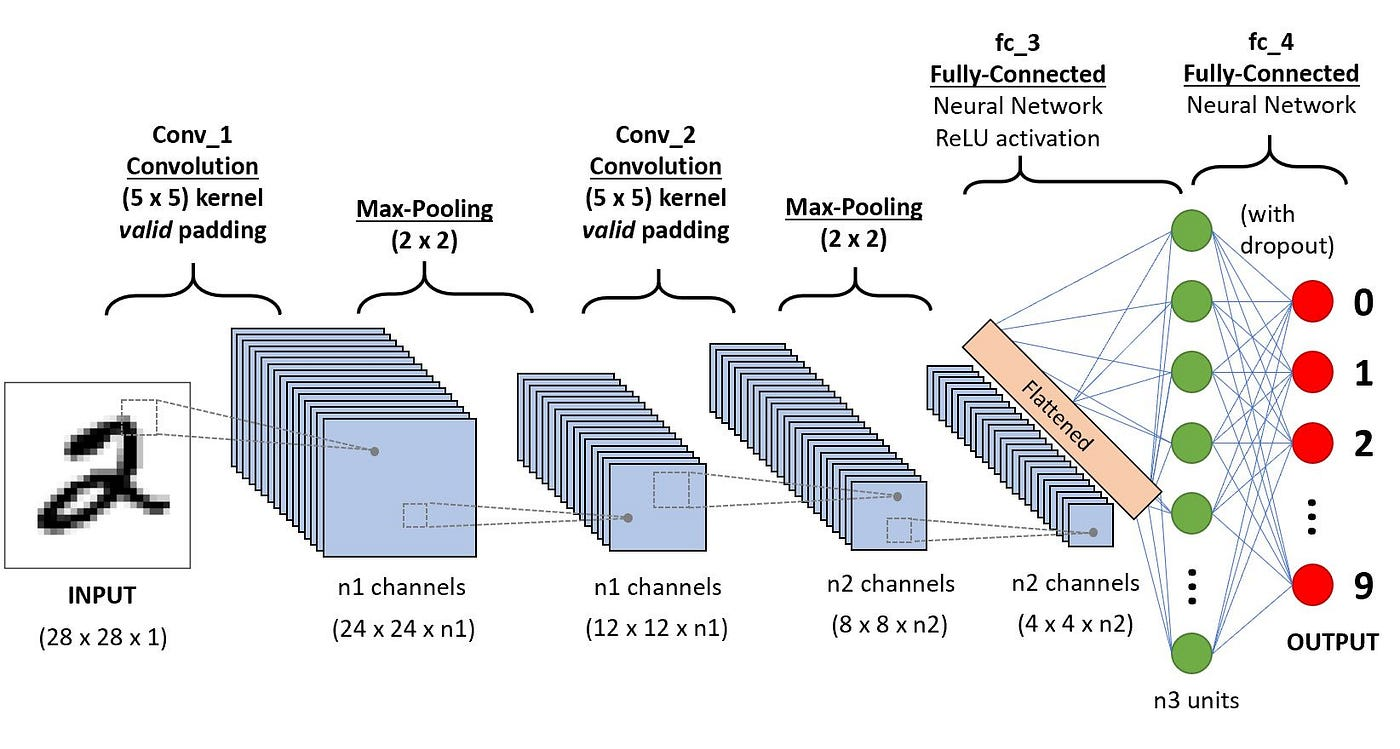

Imagine your computer is looking at a photo, trying to understand what’s in it. The convolutional layer is like a detective with a magnifying glass, scanning the image piece by piece. This detective uses tools called filters (or kernels), which are like tiny patterns or grids that help spot specific features such as edges, colors, or textures.

When a filter slides over the image, it performs a little math at each position to see how much of that feature is present. It’s like finding clues in a mystery—each filter might detect different things, like a straight line, a curve, or a color gradient. These clues help the network build a detailed understanding of the image, layer by layer.

In short, convolutional layers and filters are the dynamic duo that help computers see and understand the world in images, making sense of the visual chaos one tiny patch at a time!

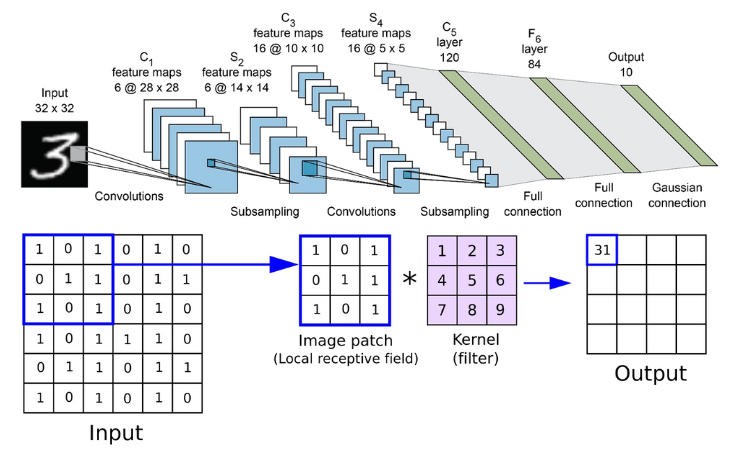